In [1]:
using ReactiveMP, Rocket, GraphPPL, Random, LinearAlgebra, Plots, Flux, Zygote, ForwardDiff, DataFrames, DelimitedFiles, Plots, StableRNGs

In [103]:
function power(j)
    return (x) -> x^j
end

@model function pol_regression(n)
    
    N_coef = 3 
    coefs = randomvar(N_coef)
    b ~ NormalMeanVariance(0.0, 100.0)

    for i in 1:3
        coefs[i] ~ NormalMeanVariance(0, 100)
    end
    
    t = randomvar(n, N_coef)
    x = datavar(Float64, n)
    y = datavar(Float64, n)
    
    for i in 1:n
        for j in 1:N_coef
            t[i, j] ~ power(j)(x[i]) where {meta = CVIApproximation(1000, 2000, Descent(0.1))}
        end 
        y[i] ~ NormalMeanVariance(coefs[1]*t[i,1] + coefs[2]*t[i,2] + coefs[3]*t[i,3] + b, 1.0)
    end
    
    return coefs, b, x, y
end

In [104]:
reala = 0.5
realb = 25
realc = 10

N = 250

rng = StableRNG(1234)

xorig = collect(1:N)

xdata = xorig .+ randn(rng, N)
ydata = realb .+ reala .* xorig .+ realc .* (xorig .* xorig) .+ randn(rng, N);

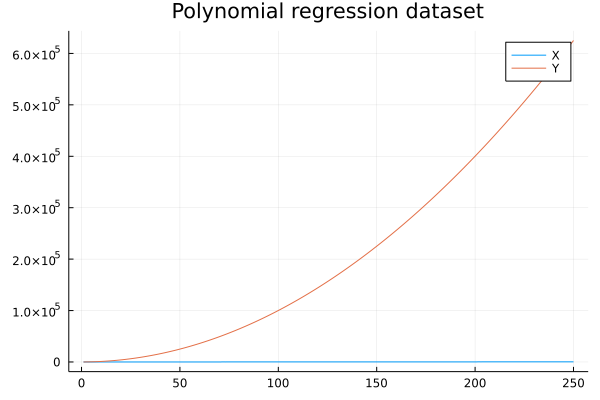

In [105]:
plot(xdata, label = "X", title = "Polynomial regression dataset")
plot!(ydata, label = "Y")

In [106]:
results = inference(
    model = Model(pol_regression, length(xdata)), 
    data  = (y = ydata, x = xdata), 
    initmessages = (coefs = NormalMeanVariance(0.0, 100.0), b = NormalMeanVariance(0.0, 100.0)),
    initmarginals = (coefs = NormalMeanVariance(0.0, 100.0), b = NormalMeanVariance(0.0, 100.0)), 
    returnvars   = (coefs = KeepLast(), b = KeepLast()), 
    iterations = 20
);

ErrorException:     Variables [ b, coefs ] have not been updated after a single inference iteration. 
    Therefore, make sure to initialize all required marginals and messages. See `initmarginals` and `initmessages` keyword arguments for the `inference` function. 
